In [1]:
import sys, os
import datetime as dt

# Add KF_scripts to sys.path
KF_SCRIPTS_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if KF_SCRIPTS_DIR not in sys.path:
    sys.path.append(KF_SCRIPTS_DIR)

print("Added to sys.path:", KF_SCRIPTS_DIR)

# === 1. Imports ===
import pandas as pd
import numpy as np
import plotly.graph_objects as go


Added to sys.path: C:\Users\User\OneDrive\Projects\TradingSystem\KF_TradingSystem


**Load processed data and execute entry and exit**

In [2]:
from src.quant.backtesting import one_day_backtest


# 1. Run simulation
df_day, df_trades, summary = one_day_backtest(
    "QQQ",
    2025, 11, 21,
    Q_high=0.9,
    window_max=500,
    cooldown=23,
    slope_smooth=True,
    # slope_smooth=False, 
    slope_smooth_window=5
)


# 3. Print summary
print(summary)
# df_trades


QQQ 2025-11-21: Trades=50, Total=-3.0400, Avg=-0.0608
{'symbol': 'QQQ', 'date': datetime.date(2025, 11, 21), 'total_pnl': np.float64(-3.040000000000191), 'num_trades': 50, 'avg_pnl': np.float64(-0.06080000000000382)}


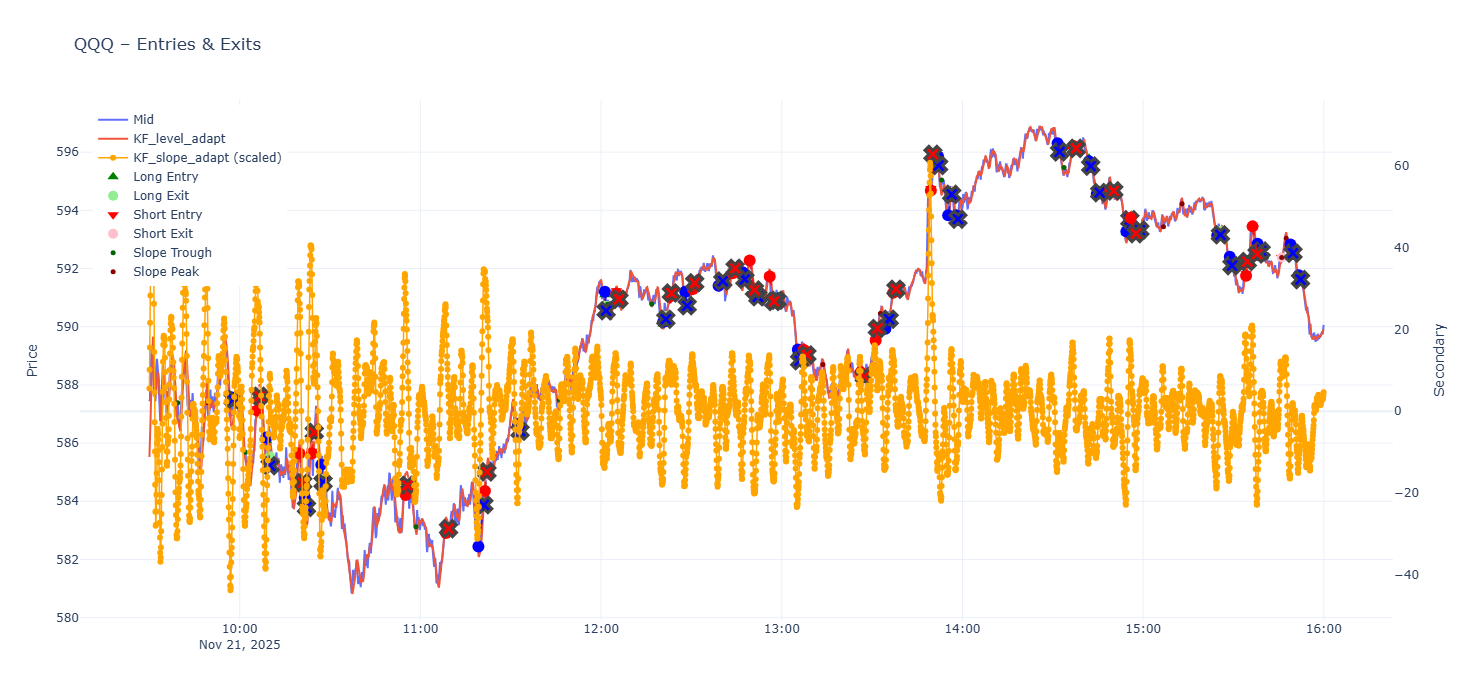

In [3]:
# 7 — now plot

# Plotting
from src.visualization.plot_utils import plot_price_signals
plot_price_signals(
    df_day,
    # trades=None,
    trades=df_trades,
    price_cols=("Mid", "KF_level_adapt"),
    secondary_cols=("KF_slope_adapt",),
    secondary_scale=1000,
    show_peaks=True,
    show_signals=True,
    show_real_trades=True,
    show_trade_lines=True,
    title="QQQ – Entries & Exits"
)



In [ ]:
# Quick sanity check
df_day[["entry_long", "exit_long", "entry_short", "exit_short"]].sum()

In [6]:
t1="2025-11-21 09:56:50-05:00"
t = "2025-11-21 09:57:20-05:00"


df_day.loc[t1:t, [
    "KF_slope_adapt",
    "region_max",
     "region_min",
    "slope_q_roll_daily",
    "slope_peak_max",
    "slope_peak_min",
    "slope_peak_min_raw",
    "slope_peak_max_raw",
    "entry_short",
     "entry_long"
]]


,KF_slope_adapt,region_max,region_min,slope_q_roll_daily,slope_peak_max,slope_peak_min,slope_peak_min_raw,slope_peak_max_raw,entry_short,entry_long
Datetime,,,,,,,,,,
2025-11-21 09:56:50-05:00,-0.042540,False,True,0.003096,False,False,False,False,False,False
2025-11-21 09:56:55-05:00,-0.043686,False,True,0.003086,False,False,False,False,False,False
2025-11-21 09:57:00-05:00,-0.043023,False,True,0.006154,False,False,True,False,False,False
2025-11-21 09:57:05-05:00,-0.040414,False,True,0.015337,False,False,False,False,False,False
2025-11-21 09:57:10-05:00,-0.036935,False,True,0.021407,False,True,False,False,False,True
2025-11-21 09:57:15-05:00,-0.034824,False,True,0.030488,False,False,False,False,False,False
2025-11-21 09:57:20-05:00,-0.033299,False,True,0.039514,False,False,False,False,False,False


In [ ]:
df_trades.columns

In [ ]:
# df_trades_sorted=df_trades.sort_index()
df_trades = df_trades.sort_values("entry_time").reset_index(drop=True)
df_trades.head

In [ ]:
t = "2025-11-21 15:12:50-05:00"
# df_day.loc[t, ["entry_short", "exit_short", "trade_id_short"]]
df_trades[df_trades['entry_time'] == '09:37:20-05:00']
df_trades[df_trades['entry_time'] == t]



In [ ]:
df_trades.info()

In [ ]:
df_day.columns

In [ ]:
df_day.loc["2025-11-21 15:12:00":"2025-11-21 15:13:00", ["entry_short"]].sum()


In [ ]:
df_day[df_day["entry_short"] == True]


In [ ]:
from src.visualization.double_axis_plot import plot_dual_axis


plot_dual_axis(
    df_day,
    ['KF_slope_adapt'],['KF_curv_adapt'] )
    